In [4]:
import numpy as np

# Load the NPZ file
npz_file_path = 'arrays_lc.npz'  # Update this to the path of your NPZ file
data = np.load(npz_file_path)

# Assuming keys are 'array_0', 'array_1', ..., 'array_10000'
arrays = [data[f'lc_{i}'] for i in range(1,len(data.files)+1)]

In [5]:
import sqlite3

def preprocess_and_insert_arrays(arrays, db_path='lightcones.db', table_name='lightcones'):
    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)
    c = conn.cursor()

    # Create table if it does not exist
    c.execute(f'''CREATE TABLE IF NOT EXISTS {table_name} (
                  id INTEGER PRIMARY KEY,
                  data BLOB
                  )''')

    for array_id, array in enumerate(arrays):
        # Preprocess the array: divide by 1000
        processed_array = array / 1000.0

        # Serialize the processed array
        data = processed_array.astype(np.float32).tobytes()

        # Insert the data into the database
        c.execute(f'INSERT INTO {table_name} (id, data) VALUES (?, ?)', (array_id, data))

    # Commit the changes and close the connection
    conn.commit()
    conn.close()

preprocess_and_insert_arrays(arrays)

(64, 64, 86)


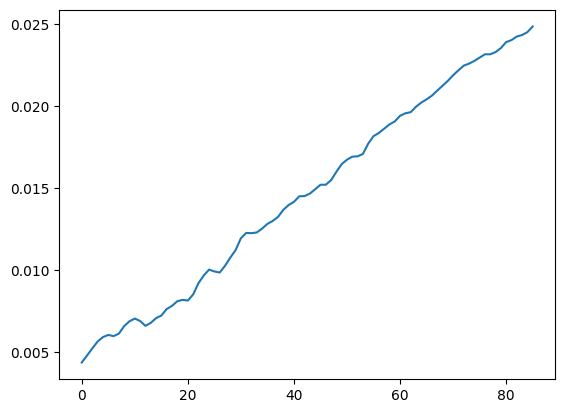

In [15]:
def load_array(array_id):
    # Connect to the SQLite database
    #conn = sqlite3.connect('lightcones.db')
    conn = sqlite3.connect('lightcones.db')
    c = conn.cursor()
    
    # Fetch the array data by ID
    c.execute('SELECT data FROM lightcones WHERE id=?', (array_id,))
    data = c.fetchone()[0]
    
    # Deserialize the array data
    array = np.frombuffer(data, dtype=np.float32).reshape((64, 64, 86))
    
    conn.close()
    return array

# Example: Load the array with ID 1
loaded_array = load_array(0)
print(loaded_array.shape)
import matplotlib.pyplot as plt
rms = []
for i in range(86):
    rms.append(np.sqrt(np.mean(loaded_array[:,:,i]**2)))
plt.plot(rms)